#### This simple tutorial is aimed to demostrate the idea of applying the Gradient Descent algorithm to solve Polynomial Curve Fitting problem

In [1]:
from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt

In general, a $N^{th}$ degree polynomial function has the form
$$f_\theta(x)=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4... = \sum_{i=0}^N \theta_ix^i  \label{eq1} \tag{1}$$ 

In [2]:
def polynomial(theta,x):
    X = np.array([x])
    for i in range(len(theta)-1):
        X = np.append(X,x)
    
    power = lambda x: np.power(x,range(len(theta)))
    t_x  = power(X)
    return np.dot(theta.T, t_x)[0]

## 1. Play with the data

##### For a given $4^{th}$ degree function $f(x)=4x^4+2x^3-5x^2+x-3$,   
$f(x_0=2)=59$

In [3]:
theta = np.flip(np.array([4, 2, -5, 1, -3]), axis = 0).reshape((-1,1))
print("f(x=2)= %.4f" %polynomial(theta, 2))

f(x=2)= 59.0000


#### Consider a synthesized dataset, which is generated from a $3^{rd}$ degree polynomial function $f(x)=x^3+2x^2-4x+5$

In [4]:
np.random.seed(0)
X = np.linspace(-3.5, 3.5, 100)

theta = np.flip(np.array([1, 2, -4, 5]), axis = 0).reshape((-1,1))

Y = X**3 +2*X**2-4*X+5

noise = np.random.normal(0, 2, len(Y))

Y_noise = Y+noise

In [5]:
print("X.shape: " + str(X.shape))
print("X[0-9]: " + str(X[0:10]))

X.shape: (100,)
X[0-9]: [-3.5        -3.42929293 -3.35858586 -3.28787879 -3.21717172 -3.14646465
 -3.07575758 -3.00505051 -2.93434343 -2.86363636]


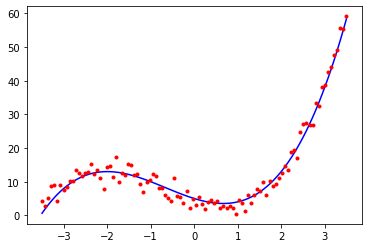

In [6]:
plt.close()
plt.plot(X,Y, 'b', X, Y_noise, 'r.')
plt.show()

## 2. Gradient Descent

In this part, you will fit the polynomial parameters $\theta$ to our dataset using gradient descent. <br/>
From the above figure, it's reasonable to suppose our dataset is generated from a $3^{rd}$ degree polynomial function, i.e our hypothesis function is
$$h_\theta(x)=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3  \label{eq2} \tag{2}$$

### 2.1 The cost function

#### The objective of the polynomial regression is to minimize the Mean of Square Error (MSE) function:
$$L(x, y,\theta)=\frac{1}{2M}\sum_{i=1}^M{[h_\theta(x^{(i)})-y^{(i)}]}^2=\frac{1}{2M}\sum_{i=1}^M{[\theta_0+\theta_1x^{(i)}+\theta_2{x^{(i)}}^2+\theta_3{x^{(i)}}^3-y^{(i)}]}^2 \label{eq3} \tag{3}$$
where M is the number of training samples, and $x^{(i)}$ is the $i^{th}$ sample in the dataset

#### Consider a synthesized dataset, which is generated from a $3^{rd}$ degree polynomial function $f(x)=x^3+2x^2-4x+5$

In [7]:
np.random.seed(0)
X = np.linspace(-3.5, 3.5, 100)
theta = np.flip(np.array([1, 2, -4, 5]), axis = 0).reshape((-1,1))

Y = X**3 +2*X**2-4*X+5
#We add a Gaussian noise N(0,2) to each Y[i]
noise = np.random.normal(0, 2, len(Y))
Y_noise = Y+noise

In [8]:
print(X.size,end ="\n")
print(Y.size,end ="\n")
print(noise.size,end ="\n")

100
100
100


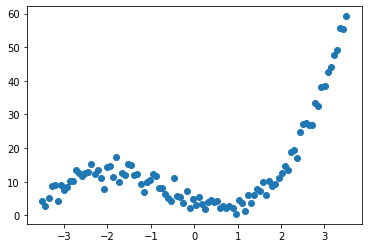

In [9]:
plt.scatter(X,Y_noise)

In [10]:
theta_zero = np.array([0, 0, 0, 0]).reshape((-1,1))
theta_zero

array([[0],
       [0],
       [0],
       [0]])

In [11]:
def ComputeCost(X, y, theta):
    M = len(X)
    L = 0
    for i in range(len(X)):     
        L += np.power(polynomial(theta,X[i]) - y[i],2) # YOUR CODE HERE
    L = np.divide(L, 2*len(X))
    return L

In [12]:
theta

array([[ 5],
       [-4],
       [ 2],
       [ 1]])

In [13]:
theta = np.flip(np.array([1, 2, -4, 5])).reshape(-1,1)
ComputeCost(X,Y_noise,theta)

2.038807235874209

In [14]:
theta_zero = np.array([0, 0, 0, 0]).reshape((-1,1))
cost = ComputeCost(X, Y_noise, theta_zero)
print('Cost at parameters thetaZero (0,0,0,0): %f \n(this value should be about 172.8149)' %cost)

Cost at parameters thetaZero (0,0,0,0): 172.814955 
(this value should be about 172.8149)


### 2.2 The Update Equation


Pseudo Code for the Algorithm of the Gradient Descent:<br>
Initialize $\theta$ <br>
For k=1...N_iteration <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Update:&nbsp;&nbsp;</strong>$\theta = \theta -\alpha \frac {\partial{L(x,y,\theta)}}{\partial{\theta}}$

In Polynomial curver fitting problem $\frac {\partial{L(x,y,\theta)}}{\partial{\theta_j}}=\frac{1}{M}\sum_{i=1}^M[h_\theta(x^{(i)})-y^{(i)}]{x^{(i)}}^j$.<br> For an example:
$\frac {\partial{L(x,y,\theta)}}{\partial{\theta_0}}=\frac{1}{M}\sum_{i=1}^M[h_\theta(x^{(i)})-y^{(i)}]$,
$\frac {\partial{L(x,y,\theta)}}{\partial{\theta_2}}=\frac{1}{M}\sum_{i=1}^M[h_\theta(x^{(i)})-y^{(i)}]{x^{(i)}}^2$

In [15]:
'''
    curve_fit: fit the polinomial function from the data X, Y and an initialized theta
    using Gradient Descent algorithm
'''
def curve_fit(X, Y, theta, alpha =0.001, n_iter = 100, display_step = 50, verbose = True):
    #for each interation, compute the gradient and make an update: theta = theta - alpha*dL
    for k in range(n_iter):
        if verbose and (k+1) % display_step ==0:
            L=ComputeCost(X, Y, theta)
            print("K=%d L=%.6f" %(k+1, L), theta) 
        dL = np.zeros(theta.shape)
        L = 0
        
        for i in range(len(X)):
            #compute the residual h(x)-y
            res = polynomial(theta,X[i]) - Y[i]# YOUR CODE HERE
            
            #compute the derivative of thetal
            dTheta = np.zeros(theta.shape)
            for j in range(len(theta)):
                #compute the value dTheta_j = [h(x)-y]x^j
                dTheta[j] = res*X[i]**j#YOUR CODE HERE
            dL = np.add(dL, dTheta)
            
        dL = np.divide(dL, len(X))
        theta = theta - np.multiply(dL, alpha) 
    return theta

In [16]:
#initialize theta_zero
theta_zero = np.zeros(theta.shape)
theta_zero = curve_fit(X, Y_noise, theta_zero, 0.001, display_step=100, n_iter=2000)

K=100 L=10.048743 [[ 0.51849576]
 [-0.203051  ]
 [ 2.60104638]
 [ 0.5645729 ]]
K=200 L=8.964726 [[ 0.69128082]
 [-0.45200785]
 [ 2.68681282]
 [ 0.59253513]]
K=300 L=8.180384 [[ 0.84337887]
 [-0.68511059]
 [ 2.67055031]
 [ 0.61871666]]
K=400 L=7.483754 [[ 0.98845369]
 [-0.90336884]
 [ 2.65109659]
 [ 0.64323089]]
K=500 L=6.864521 [[ 1.12731018]
 [-1.10772792]
 [ 2.63232041]
 [ 0.66618401]]
K=600 L=6.313851 [[ 1.26023395]
 [-1.29907297]
 [ 2.61434028]
 [ 0.68767542]]
K=700 L=5.823943 [[ 1.38747922]
 [-1.47823275]
 [ 2.59712801]
 [ 0.70779821]]
K=800 L=5.387901 [[ 1.50928861]
 [-1.64598324]
 [ 2.58065104]
 [ 0.72663954]]
K=900 L=4.999629 [[ 1.62589434]
 [-1.80305101]
 [ 2.56487796]
 [ 0.74428101]]
K=1000 L=4.653739 [[ 1.7375187 ]
 [-1.95011636]
 [ 2.5497787 ]
 [ 0.76079903]]
K=1100 L=4.345464 [[ 1.8443745 ]
 [-2.08781627]
 [ 2.53532448]
 [ 0.77626515]]
K=1200 L=4.070588 [[ 1.94666546]
 [-2.21674715]
 [ 2.52148774]
 [ 0.79074635]]
K=1300 L=3.825377 [[ 2.04458657]
 [-2.33746743]
 [ 2.5082421

In [17]:
print("theta_zero", theta_zero)
print('You should expect to see the value of theta [[2.623],[-2.993],[2.4299],[0.87797]]')

theta_zero [[ 2.6231023 ]
 [-2.99333081]
 [ 2.42998715]
 [ 0.87797034]]
You should expect to see the value of theta [[2.623],[-2.993],[2.4299],[0.87797]]


In [18]:
theta_zero

array([[ 2.6231023 ],
       [-2.99333081],
       [ 2.42998715],
       [ 0.87797034]])

### 2.3 Visualize the fitted curve

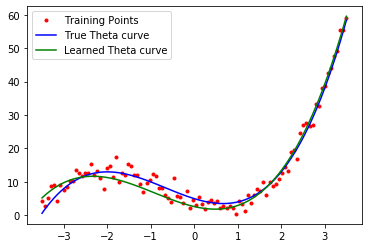

In [19]:
Y_pred = np.array([])
for i in range(len(X)):
    Y_pred =np.append(Y_pred,polynomial(theta_zero,X[i]))

plt.close()
plt.plot(X, Y_noise, 'r.', label='Training Points')
plt.plot(X,Y, 'b', label = 'True Theta curve')
plt.plot( X, Y_pred, 'g', label = 'Learned Theta curve')
plt.legend( loc='upper left', borderaxespad=0.5)
plt.show()